#putting it all together with a multiclass classification



### **Definition of Multiclass Classification**  
Multiclass classification is a type of machine learning problem where a model assigns an input to **one** of **three or more** possible categories (classes).  

Unlike **binary classification** (which has only two classes), multiclass classification deals with **multiple** labels.  

#### **Example Scenarios:**
- Identifying **animals** in an image (**cat, dog, bird**).
- Recognizing **handwritten digits** (**0 to 9**).
- Classifying **types of fruit** (**apple, banana, orange**).  

---

### **How It Works in Neural Networks**
1. **Input Layer**  
   - Takes in **features** (e.g., pixel values for an image, text embeddings for a document).  

2. **Hidden Layers**  
   - Apply **linear transformations** and **non-linear activation functions** (like ReLU) to learn patterns.  

3. **Output Layer**  
   - Contains **one neuron per class** (e.g., `out_features = 3` for three classes).  
   - Outputs **raw logits** (scores), which are converted to **probabilities** using **Softmax**.

4. **Prediction**  
   - The class with the **highest probability** is selected using `argmax()`.  

---

### **Key Components in PyTorch**
| Component               | Purpose |
|-------------------------|---------|
| **`nn.Linear()`**       | Creates layers with multiple outputs (one per class). |
| **`torch.nn.CrossEntropyLoss()`** | Computes loss between logits and true labels (applies Softmax internally). |
| **`torch.argmax()`**    | Gets the predicted class from the output probabilities. |

---

Would you like an example implementation? 🚀

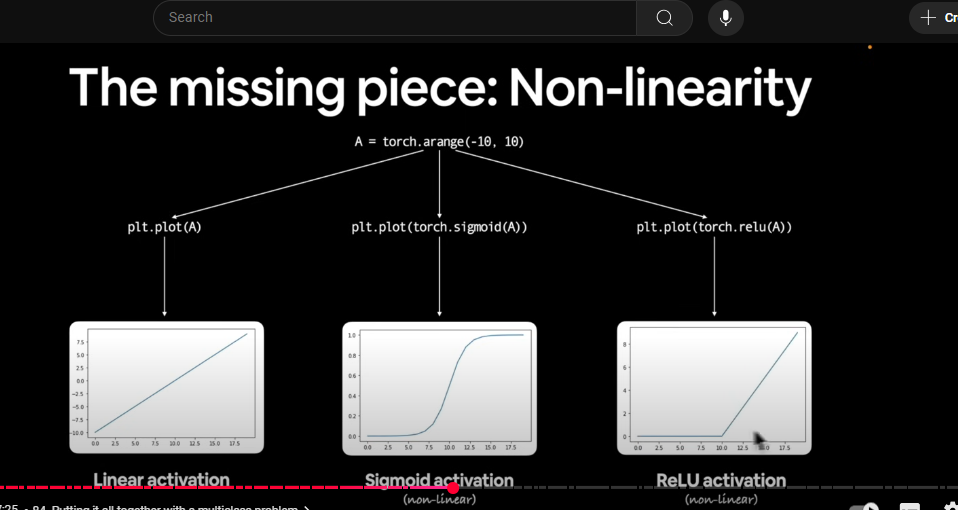

![image.png](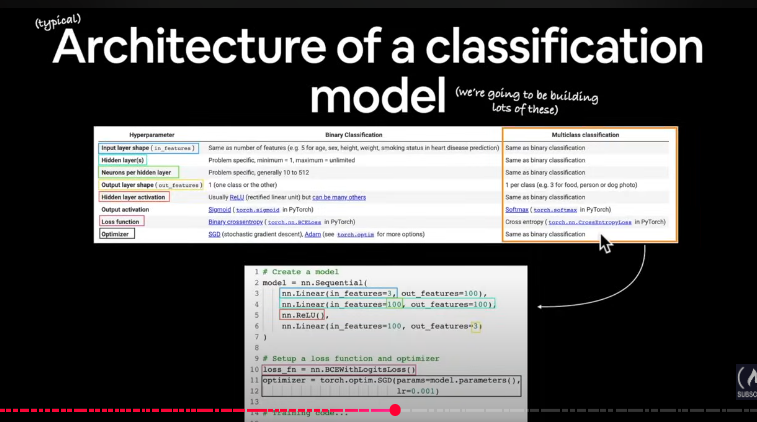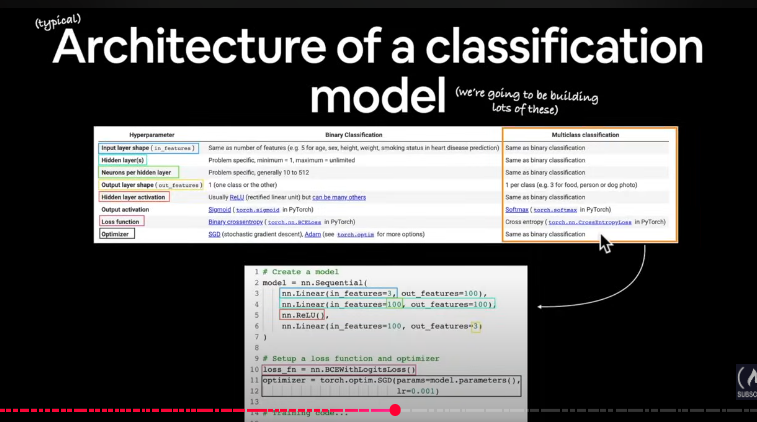)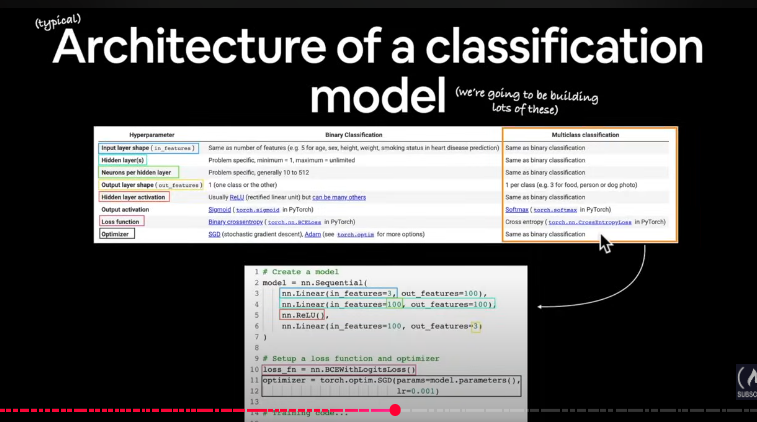

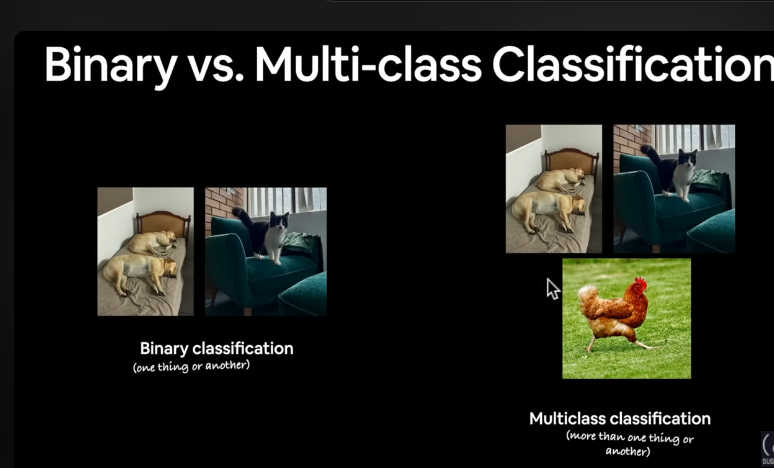

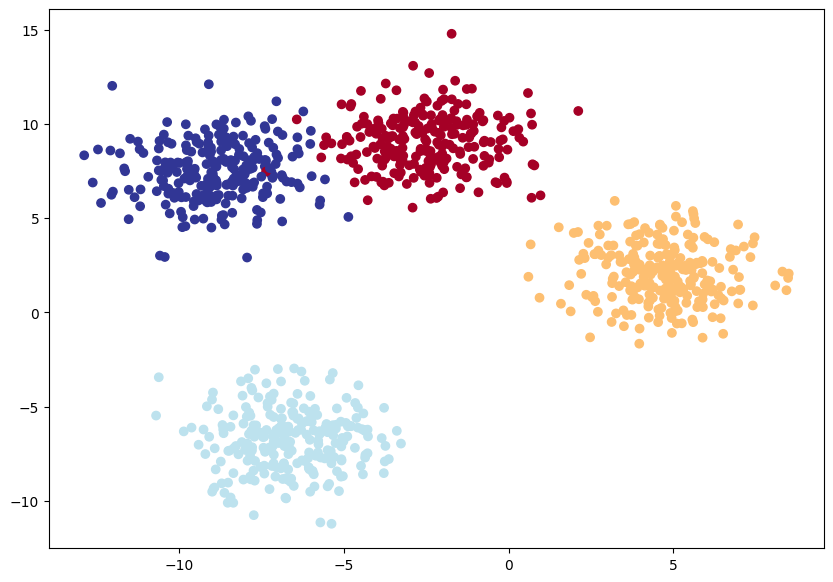

In [1]:
from numbers import Number
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data creation
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#1 Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,#give randomness
                            shuffle=True,
                            random_state=RANDOM_SEED)
#2 turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.float)

#3 split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#visualize
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)



This code is preparing a **multiclass classification dataset** using **sklearn's `make_blobs`** and then splitting it into training and testing sets. Here's a breakdown of each step:

---

### **📌 Understanding the Code**
#### **1️⃣ Creating a Multiclass Dataset**
- `make_blobs()` generates **4 clusters (classes)** of points in **2D space**.
- `n_samples=1000` → Creates **1000** data points.
- `n_features=2` → Each point has **2 features (x, y coordinates)**.
- `centers=NUM_CLASSES` → Creates **4 distinct classes**.
- `cluster_std=1.5` → Controls the **spread** of each cluster.
- `random_state=42` → Ensures **reproducibility**.

#### **2️⃣ Converting Data to PyTorch Tensors**
- `torch.from_numpy(X_blob).type(torch.float)`  
  - Converts the NumPy array to a PyTorch tensor **with float values**.
- `torch.from_numpy(y_blob).type(torch.float)`  
  - Converts the labels (`y_blob`) into a tensor **with float values**.

#### **3️⃣ Splitting into Train & Test Sets**
- `train_test_split()`  
  - **80% training data** (`X_blob_train`, `y_blob_train`).
  - **20% test data** (`X_blob_test`, `y_blob_test`).
  - `random_state=RANDOM_SEED` ensures **consistent splitting**.

#### **4️⃣ Visualizing the Data**
- `plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)`  
  - Creates a **scatter plot**.
  - Colors each point according to its **class (`y_blob`)**.
  - Uses the **Red-Yellow-Blue (`RdYlBu`) color map** for better distinction.

---

### **🔍 Expected Output**
- A **scatter plot** with **four clusters**, each represented in a different color.
- This visualization helps verify that the data is correctly labeled and clustered.

---

### **💡 Next Steps**
Would you like to **build a PyTorch model** for this dataset? You’ll need:
1. A **neural network** with:
   - **2 input features** (since our data is 2D).
   - **Hidden layers** with activation functions (e.g., ReLU).
   - **4 output neurons** (one for each class).
2. The **Cross Entropy Loss function** (`nn.CrossEntropyLoss()`).
3. An **optimizer** (e.g., Adam or SGD).
4. A **training loop** to update weights.

Let me know if you'd like to proceed with model creation! 🚀

In [65]:
import requests
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(request.content)
from helper_functions import accuracy_fn

# building  a multiclass classification model

In [3]:
# create device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
from torch import nn

In [19]:
# model with non-liniarity

In [22]:
class BlobModel(torch.nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
      )

  def forward(self,x):
    return self.linear_layer_stack(x)

#create blob model
model1=BlobModel(input_features=2,output_features=4,hidden_units=8).to(device)


In [54]:

model1

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [55]:
X_blob_train.shape,torch.unique(y_blob_train),y_blob_train.shape

(torch.Size([800, 2]), tensor([0., 1., 2., 3.]), torch.Size([800]))

# loss function and Optimizer

In [56]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html


#getting prediction probabilities for a multiclass model  

in order to evaluate and train and test our model , we need to convert our models output to

logits->prediction probabilities-> prediction labels

In [57]:
model1.eval()
with torch.inference_mode():
  y_logits=model1(X_blob_train.to(device))
y_logits[:5]

tensor([[-0.1677, -0.1736,  0.0954, -0.6214],
        [ 0.4508,  0.2550, -0.6566, -0.3133],
        [ 1.1849, -0.0818, -0.8416, -1.1395],
        [ 0.8284, -0.0638, -0.5384, -0.8262],
        [ 0.5881,  0.2245, -0.5551, -0.2823]])

In [58]:
y_preds_probs=(torch.softmax(y_logits,dim=1))#converion to prediction probabilities
print(y_preds[:5])
print("\n")
print(y_logits[:5])

tensor([2, 0, 0, 0, 0])


tensor([[-0.1677, -0.1736,  0.0954, -0.6214],
        [ 0.4508,  0.2550, -0.6566, -0.3133],
        [ 1.1849, -0.0818, -0.8416, -1.1395],
        [ 0.8284, -0.0638, -0.5384, -0.8262],
        [ 0.5881,  0.2245, -0.5551, -0.2823]])


In [59]:
torch.sum(y_preds_probs[0])

tensor(1.)

In [60]:
#convert prediction probabilities to prediction labels
y_preds_probs_labels=torch.argmax(y_preds_probs,dim=1)
y_preds_probs_labels

tensor([2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0,
        0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
        0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0,
        0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2,
        0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
        2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0,
        0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [61]:
torch.unique(y_preds_probs_labels)

tensor([0, 1, 2])

### **Getting Prediction Probabilities for a Multiclass Model**  
In a **multiclass classification problem**, we need to convert the raw model outputs (**logits**) into **prediction probabilities** and then into **class labels**.  

---

### **📌 Steps to Convert Model Outputs**
1️⃣ **Logits** → The raw scores produced by the neural network before activation.  
2️⃣ **Prediction Probabilities** → Convert logits into probabilities using **softmax activation**.  
3️⃣ **Prediction Labels** → Convert probabilities into class labels (e.g., class 0, 1, 2, 3) by selecting the highest probability.

---

### **🔹 Step 1: Get Logits**
When we pass data through our model (`model(X)`), it returns **logits**. These are unnormalized scores, meaning they **haven’t been converted to probabilities yet**.

- **Example of logits output (before softmax):**  
  ```
  tensor([[ 2.3, -1.2,  0.5,  1.8],
          [-0.5,  3.2,  1.0,  0.1],
          [ 1.5,  0.2, -1.0,  2.8]])
  ```
  Each row represents a sample, and each column represents a class score.

---

### **🔹 Step 2: Convert Logits to Probabilities**
To get prediction probabilities, we apply the **softmax function**.  
Softmax converts the logits into probabilities (values between **0 and 1**) that sum to **1** across each row.

- **Formula for Softmax:**  
  \[
  P(y_i) = \frac{e^{logit_i}}{\sum e^{logit_j}}
  \]
  - **`torch.nn.functional.softmax(logits, dim=1)`** applies softmax along the class dimension.

- **Example (after softmax):**
  ```
  tensor([[0.65, 0.05, 0.10, 0.20],
          [0.02, 0.80, 0.10, 0.08],
          [0.25, 0.10, 0.05, 0.60]])
  ```
  - Now, each row represents the probability distribution over the **4 classes**.

---

### **🔹 Step 3: Convert Probabilities to Class Labels**
To get the final class predictions, we **select the class with the highest probability** using `torch.argmax()`.

- **`torch.argmax(probabilities, dim=1)`** returns the index of the highest probability class for each sample.

- **Example (final predictions):**
  ```
  tensor([0, 1, 3])
  ```
  - First sample → Class **0** (highest probability: 0.65).  
  - Second sample → Class **1** (highest probability: 0.80).  
  - Third sample → Class **3** (highest probability: 0.60).  

---

### **📝 Summary**
| Step | Action | PyTorch Function |
|------|--------|-----------------|
| 1️⃣ Logits | Model's raw output | `model(X)` |
| 2️⃣ Probabilities | Apply Softmax | `torch.softmax(logits, dim=1)` |
| 3️⃣ Predictions | Get highest probability class | `torch.argmax(probabilities, dim=1)` |

---

### **🔹 Final PyTorch Code**
```python
import torch.nn.functional as F

# Example logits output (3 samples, 4 classes)
logits = torch.tensor([[ 2.3, -1.2,  0.5,  1.8],
                       [-0.5,  3.2,  1.0,  0.1],
                       [ 1.5,  0.2, -1.0,  2.8]])

# Step 2: Convert logits to probabilities
probabilities = F.softmax(logits, dim=1)

# Step 3: Get final predictions
predictions = torch.argmax(probabilities, dim=1)

print("Probabilities:\n", probabilities)
print("Predictions:\n", predictions)
```

---

### **💡 Next Steps**
Would you like to integrate this into your **training loop** to track accuracy? 🚀

#training and testing loops

In [66]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model1.train()
  #forwardpass
  y_logits=model1(X_blob_train)
  y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)
  #loss
  loss=loss_fn(y_logits,y_blob_train)
  acc= accuracy_fn(y_preds,y_blob_train)
  #zero grad
  optimizer.zero_grad()
  #backprop
  loss.backward()
  #step
  optimizer.step()
  #lets test
  model1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model1(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    #test loss
    loss_test=loss_fn(test_logits,y_blob_test)
    acc_test=accuracy_fn(test_preds,y_blob_test)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%")


RuntimeError: expected scalar type Long but found Float

The error **"expected scalar type Long but found Float"** happens because **`torch.nn.CrossEntropyLoss` requires the target (`y_blob_train`) to be of type `torch.long` (integer labels), but it is currently `torch.float` (floating point).**  

---

### **📌 Solution: Convert Labels to `torch.long`**  
Modify the dataset preprocessing step where you convert `y_blob_train` and `y_blob_test` into tensors:  

#### **✅ Corrected Code**
```python
# Convert labels to integers (Long type)
y_blob_train = y_blob_train.type(torch.long)
y_blob_test = y_blob_test.type(torch.long)
```

Or, you can do it just before passing to `loss_fn`:
```python
# Convert target labels to long before loss calculation
loss = loss_fn(y_logits, y_blob_train.long())
```

---

### **💡 Why Does This Happen?**
- `torch.nn.CrossEntropyLoss()` expects **integer class labels** (not one-hot or floating-point values).  
- Example of correct labels:  
  ```python
  tensor([0, 1, 2, 3, 0, 1, 2, 3])  # Correct (dtype: torch.long)
  ```
- If your labels are `float` type (e.g., `tensor([0.0, 1.0, 2.0])`), PyTorch raises an error.

---

### **🔹 Quick Fix in Your Code**
Modify this line in your training loop:
```python
loss = loss_fn(y_logits, y_blob_train)  # ❌ ERROR
```
To:
```python
loss = loss_fn(y_logits, y_blob_train.long())  # ✅ FIXED
```

Now your code should run without errors! 🚀 Let me know if you need further clarification. 😊

In [70]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model1.train()
  #forwardpass
  y_logits=model1(X_blob_train)
  y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)
  #loss
  loss=loss_fn(y_logits,y_blob_train.long())
  acc= accuracy_fn(y_preds,y_blob_train)
  #zero grad
  optimizer.zero_grad()
  #backprop
  loss.backward()
  #step
  optimizer.step()
  #lets test
  model1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model1(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    #test loss
    loss_test=loss_fn(test_logits,y_blob_test.long())
    acc_test=accuracy_fn(test_preds,y_blob_test)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%")


Epoch: 0 | Loss: 1.59510, Acc: 18.62% | Test Loss: 1.26433, Test Acc: 43.00%
Epoch: 10 | Loss: 0.71255, Acc: 94.62% | Test Loss: 0.64441, Test Acc: 97.00%
Epoch: 20 | Loss: 0.26833, Acc: 99.25% | Test Loss: 0.23734, Test Acc: 100.00%
Epoch: 30 | Loss: 0.15514, Acc: 96.62% | Test Loss: 0.14474, Test Acc: 96.50%
Epoch: 40 | Loss: 0.07462, Acc: 99.12% | Test Loss: 0.06526, Test Acc: 99.50%
Epoch: 50 | Loss: 0.05785, Acc: 99.12% | Test Loss: 0.04970, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04894, Acc: 99.00% | Test Loss: 0.04083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04348, Acc: 99.00% | Test Loss: 0.03526, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03982, Acc: 99.00% | Test Loss: 0.03145, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03722, Acc: 99.00% | Test Loss: 0.02868, Test Acc: 99.50%


#visualize


In [76]:
from helper_functions import plot_decision_boundary

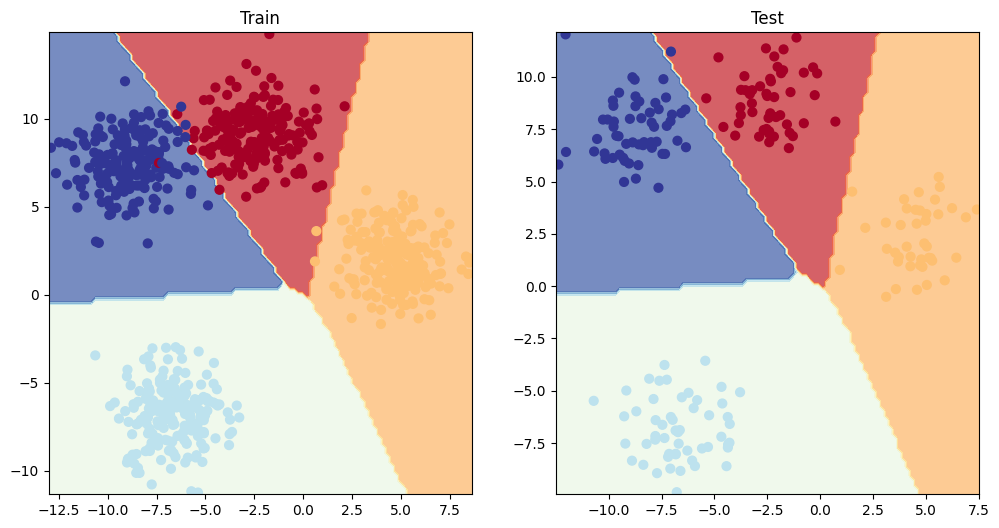

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_blob_test, y_blob_test)

# a few more classification metrics (to evaluate our classification model)

-Accuracy


precision


recall


F1-score


confusion matrix


classification report


### **📌 Classification Metrics to Evaluate a Model**
When evaluating a classification model, we often use multiple metrics to get a complete picture of its performance. Here are some key metrics:

---

### **1️⃣ Accuracy (Overall Performance)**
**Definition:** The ratio of correctly predicted samples to the total samples.

\[
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
\]

**When to Use:**  
- Best for **balanced datasets** (where classes have similar sizes).
- Not good for **imbalanced datasets** (e.g., 99% of samples belong to one class).

---

### **2️⃣ Precision (Positive Predictive Value)**
**Definition:** The ratio of correctly predicted positive samples to total predicted positives.

\[
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
\]

**When to Use:**  
- Important when **False Positives (FP)** are costly (e.g., spam detection, medical diagnosis).  
- Higher precision means fewer incorrect positive predictions.

---

### **3️⃣ Recall (Sensitivity, True Positive Rate)**
**Definition:** The ratio of correctly predicted positives to actual positives.

\[
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\]

**When to Use:**  
- Important when **False Negatives (FN)** are costly (e.g., missing a disease in a medical test).  
- Higher recall means the model finds more actual positive cases.

---

### **4️⃣ F1-Score (Balance Between Precision & Recall)**
**Definition:** The harmonic mean of Precision and Recall.

\[
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

**When to Use:**  
- Best for **imbalanced datasets** where both **False Positives (FP)** and **False Negatives (FN)** matter.
- A high F1-score means a good balance between Precision and Recall.

---

### **5️⃣ Confusion Matrix**
A table showing the model's predictions compared to actual labels.

| **Actual \ Predicted** | **Positive (1)** | **Negative (0)** |
|-----------------|--------------|--------------|
| **Positive (1)** | ✅ True Positive (TP) | ❌ False Negative (FN) |
| **Negative (0)** | ❌ False Positive (FP) | ✅ True Negative (TN) |

**When to Use:**  
- Helps understand the types of errors the model makes.  
- Useful for both **binary** and **multiclass classification**.

---

### **6️⃣ Classification Report (Summary of Metrics)**
A single function (`classification_report` from `sklearn`) that gives:

- Precision
- Recall
- F1-Score
- Support (number of samples per class)

---

### **📌 How to Implement These Metrics in PyTorch**
You can use `sklearn.metrics` to calculate them:

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Example: Assume y_true and y_pred are the actual and predicted labels
y_true = [0, 1, 1, 0, 1, 2, 2, 2]  # Actual labels
y_pred = [0, 1, 0, 0, 1, 2, 1, 2]  # Predicted labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")  # "weighted" for multiclass
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Classification report
report = classification_report(y_true, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
```

---

### **📌 Summary: When to Use Each Metric**
| **Metric**  | **Best For** | **Avoid When** |
|------------|-------------|--------------|
| **Accuracy** | Balanced datasets | Imbalanced datasets |
| **Precision** | When False Positives matter (e.g., spam detection) | If False Negatives are critical |
| **Recall** | When False Negatives matter (e.g., medical diagnosis) | If False Positives are critical |
| **F1-Score** | When you need a balance of Precision & Recall | If class imbalance is extreme |
| **Confusion Matrix** | Understanding exact error types | Not useful for a single score |
| **Classification Report** | Quick overview of all metrics | Needs more interpretation |

---

### **✅ Conclusion**
- If **dataset is balanced**, use **Accuracy**.
- If **False Positives are costly**, focus on **Precision**.
- If **False Negatives are costly**, focus on **Recall**.
- If **you need a balance**, use **F1-Score**.
- Always check the **Confusion Matrix** for a deeper understanding.

Let me know if you need more details! 🚀



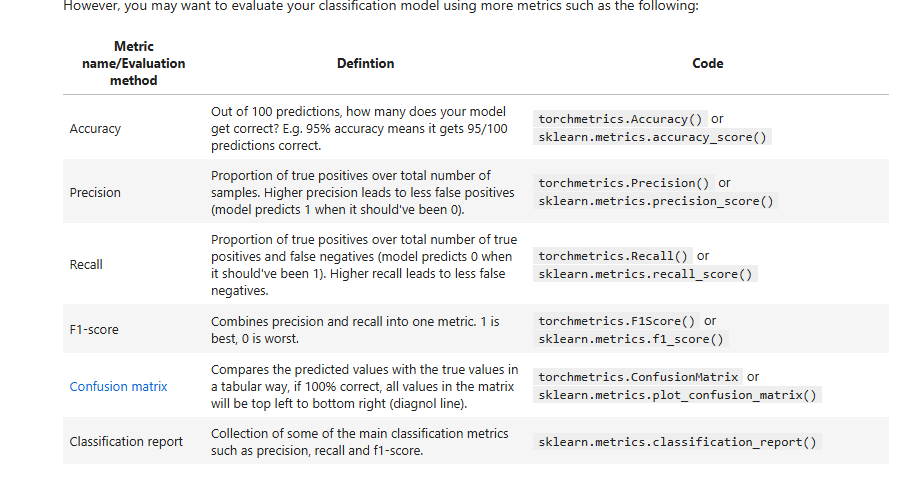

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out TorchMetrics, especially the TorchMetrics classification section.

In [83]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 897.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [84]:


from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)